In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [6]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

In [9]:
#1.Data Cleaning
#2. EDA
#3. Text preprocessing
#4. Model Building
#5 Evaluation
#6 Improvement
#7. Website
#8. Deployment

**DATA CLEANING**

> Add blockquote



In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df.sample(10)

,v1,v2
1931,ham,What pa tell me.. I went to bath:-)
1780,spam,BIG BROTHER ALERT! The computer has selected u...
4453,ham,I'm home. Ard wat time will u reach?
3855,ham,I'm ok. Will do my part tomorrow
240,ham,Tomarrow final hearing on my laptop case so i ...
3553,ham,am up to my eyes in philosophy
2813,ham,"Alright if you're sure, let me know when you'r..."
2465,ham,S.i think he is waste for rr..
5045,ham,Desires- u going to doctor 4 liver. And get a ...
4509,ham,This weekend is fine (an excuse not to do too ...


In [13]:
df.rename(columns={'v1':'type','v2':'text'},inplace=True)

In [14]:
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [16]:
df['type']=df['type'].str.replace('ham',"0")
df['type']=df['type'].str.replace('spam',"1")
df['type']=df['type'].astype(int)

In [17]:
df.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.isnull().sum() #missing values

,0
type,0
text,0


In [19]:
# duplicate values
df.duplicated().sum()

403

In [20]:
df=df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(5169, 2)

**EDA**

In [23]:
df['type'].value_counts()

,count
type,
0,4516
1,653


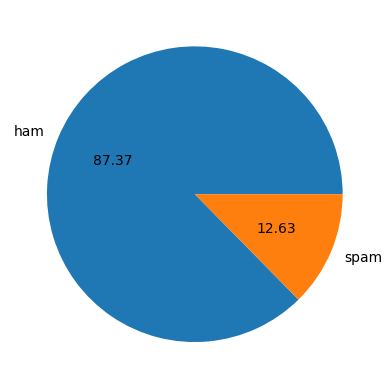

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['type'].value_counts(),labels=['ham','spam'],autopct="%0.2f") # atopct=percentage
plt.show()

In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
df['num_char']=df['text'].apply(len) #  adding new column in data set wich contains len of each message

In [28]:
df.head()

,type,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
# counting no of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x))) # breaking words and counting by no of words

KeyError: 'text'

In [ ]:
df.head(10)

In [33]:
#counting no of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

KeyError: 'text'

In [ ]:
df.head()

In [ ]:
df[['num_char','num_words','num_sentences']].describe() # describe for all messages

In [ ]:
df[df['type']==0][['num_char','num_words','num_sentences']].describe() # describe for ham messages

In [ ]:
df[df['type']==1][['num_char','num_words','num_sentences']].describe() # describe for spam messages

In [ ]:
import seaborn as sna

In [ ]:
plt.figure(figsize=(12,6))  # based on this we can find ham messages are made with less chas while spam with more chars
sns.histplot(df[df['type']==0]['num_char'])
sns.histplot(df[df['type']==1]['num_char'],color='red')

In [ ]:
sns.pairplot(df,hue='type',height=5) # we can find outliers

**Data Preprocessing**



*   Lowercase


*   Tokenization
*   Removing special characters


*   removing stop words and punctuation

*   stemming( convert similar words into a  single word)








In [ ]:
import string
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)  # convert to array of lower case words
  y=[]
  for i in text:               # for removing special charcters
    if i.isalnum():
      y.append(i)
  text=y[:] #cloning
  y.clear()
  for i in text:                   # for  remving stop words
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:                     # for removing stemming
    y.append(ps.stem(i))
  return " ".join(y)    # removing special char and stop words

In [ ]:
transform_text('Good Evening Girls %%') # example of removing special charcter

In [ ]:
transform_text('Do you Like me?') # for stop words

In [ ]:
transform_text('I loved food') # for stemming

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['text'][1540]

In [31]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
transform_text('Go until jurong point, crazy.. Available only ..')

In [ ]:
df['transform_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

In [ ]:
from wordcloud import WordCloud # to find  words which occured more
wc=WordCloud(width=500,height=500,min_font_size=8,background_color='black')

In [ ]:
spam_wc=wc.generate(df[df['type']==1]['transform_text'].str.cat(sep=" "))

In [ ]:
ham_wc=wc.generate(df[df['type']==0]['transform_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [ ]:
s_corpus=[]
for m in df[df['type']==1]['transform_text'].tolist():
  for w in m.split():
    s_corpus.append(w)


In [ ]:
len(s_corpus)

In [ ]:
h_corpus=[]
for m in df[df['type']==0]['transform_text'].tolist():
  for w in m.split():
    h_corpus.append(w)


In [ ]:
len(h_corpus)

In [ ]:
from collections import Counter
Counter(s_corpus).most_common(30)

In [ ]:
Counter(h_corpus).most_common(30)

In [ ]:
df.head()

**Model Building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)


In [ ]:
X=tfidf.fit_transform(df['transform_text']).toarray();

In [ ]:
X.shape

In [ ]:
y=df['type'].values

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gn=GaussianNB()
mn=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gn.fit(X_train,y_train)      # for gaussian naive baise we are calculation accuracy,precision ,confusion
y_pred1=gn.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

In [ ]:
mn.fit(X_train,y_train)                 # for multinomial naive baise we are calculation accuracy,precision ,confusion
y_pred2=mn.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
bnb.fit(X_train,y_train)              # for bernoullis naive baise we are calculation accuracy,precision ,confusion
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

In [ ]:
# tfidf--> mn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=
                           50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)


In [ ]:
clfs={
    'SVC':svc,
    'KN':knc,
    'MB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
  print(f"{name} accuracy is {current_accuracy}")
  print(f"{name} precision is {current_precision}")
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)


In [ ]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

In [ ]:
#model improved with max with scaling precision decreases


In [ ]:
#import pickle #files pickle
#pickle.dump(tfidf,open('vectorizer.pkl','wb'))
#pickle.dump(mnb,open('model.pkl','wb'))